<h1>Segmenting and Clustering Neighborhoods in Toronto </H1>
<h3> Finding out suitable area for food and bar business. </h3>

Background - <p>
Toronto is big city with multiple Boroughs and each Borough has multiple neighbourhood. 
It is not easy for a businessman who is looking to start a food or liquor business to select suitable area.
Even for tourist or foodies also would like to get areas with good restaurants.
Party lover people would look for bar or pub areas for chilling outs.
<p>

Description of problem - <p>
This study is about to find out localities which will be suitable for food or liquor business.
Also it will give good picture to food lover or party lover peoples for there destination for lunch, breakfast , diner or for party.

<p>
Solutions - <p>
We have taken top 10 categories from each neighbours. Out of all top 10 categories food and bar categories are selected. All categories are segregated into Restaurant only, tea, coffe shop or light food shop and bar or pub.
We have separted each neighbourhoods to few clustered base on the availability of these super category types. Charts and graph are included to figure out high , moderate or low restaurant or bar zone area which any person can use for their own purpose.



Import all necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from pandas.io.json import json_normalize
import requests

# set displaying all values from pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#import geocoder # import geocoder

In [3]:
# Address to latitude and longitude
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [4]:
# displaying map
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [5]:
# for Kmean clustering
from sklearn.cluster import KMeans

Download data from wikipage

In [6]:
!wget -q -O 'toronto_data.csv' https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
print('Data downloaded!')

Data downloaded!


<H1> Data Analysis </H1>

Load and explore data

Drop cells with a borough that is Not assigned

In [7]:
df_toronto = pd.read_html('toronto_data.csv')[0]
df_toronto = df_toronto[df_toronto['Borough'] !='Not assigned']
df_toronto

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [8]:
df_toronto_groupby = df_toronto.groupby(['Postcode','Borough'],as_index=False)
df_toronto_groupby.first()


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Rouge
1,M1C,Scarborough,Highland Creek
2,M1E,Scarborough,Guildwood
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,East Birchmount Park
7,M1L,Scarborough,Clairlea
8,M1M,Scarborough,Cliffcrest
9,M1N,Scarborough,Birch Cliff


Combine postal code when multiple postal code a

In [9]:
df_toronto_groupby = df_toronto_groupby.agg(lambda x : ','.join(x))


In [10]:
df_toronto_groupby.loc[df_toronto_groupby['Neighbourhood']=='Not assigned','Neighbourhood']=df_toronto_groupby[df_toronto_groupby['Neighbourhood']=='Not assigned']['Borough']

In [11]:
df_toronto_groupby.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [12]:
df_toronto_groupby.loc[df_toronto_groupby['Neighbourhood']==df_toronto_groupby['Borough']]

,Postcode,Borough,Neighbourhood


In [13]:
df_toronto_groupby.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [14]:
#Download cordinate data
!wget -q -O 'cordinate_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [15]:
# Read Cordinate data
df_cordinate = pd.read_csv('cordinate_data.csv')
df_cordinate.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
# Merge both dataframe and append cordinates to each post code
df_toronto_cordinate = pd.merge(df_toronto_groupby,df_cordinate,left_on='Postcode',right_on='Postal Code',how='inner') 
df_toronto_cordinate

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",M1N,43.692657,-79.264848


In [17]:
# Get only records with toronto borough
df_toronto_borough = df_toronto_cordinate[df_toronto_cordinate['Borough'].str.find('Toronto')!=-1].reset_index(drop=True)
df_toronto_borough

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park,Summerhill East",M4T,43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",M4V,43.686412,-79.400049


In [18]:
# Get Cordinates for Toronto
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="Canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [19]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto_borough['Latitude'], df_toronto_borough['Longitude'], df_toronto_borough['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [20]:
CLIENT_ID = '0C5RF20Z3DEQPEKCURMKBYXNRXE2Q20TV0E4WYZRGPGLUO4E' # your Foursquare ID 0C5RF20Z3DEQPEKCURMKBYXNRXE2Q20TV0E4WYZRGPGLUO4E
CLIENT_SECRET = 'LAX2X2AGVTS4WL2XGF1X135UBVHDPJQKHZYQX5QO03OG2ISS' # your Foursquare Secret LAX2X2AGVTS4WL2XGF1X135UBVHDPJQKHZYQX5QO03OG2ISS
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0C5RF20Z3DEQPEKCURMKBYXNRXE2Q20TV0E4WYZRGPGLUO4E
CLIENT_SECRET:LAX2X2AGVTS4WL2XGF1X135UBVHDPJQKHZYQX5QO03OG2ISS


In [21]:
# Explore first neighborhood data
df_toronto_borough.loc[0, 'Neighbourhood']

'The Beaches'

In [22]:
neighborhood_latitude = df_toronto_borough.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto_borough.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto_borough.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [23]:
# Top 100 venues for first neighbor within 500 meters
#set limt
LIMIT=100

#set radius
radius =500

#create url for foursquare
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL    


'https://api.foursquare.com/v2/venues/explore?client_id=0C5RF20Z3DEQPEKCURMKBYXNRXE2Q20TV0E4WYZRGPGLUO4E&client_secret=LAX2X2AGVTS4WL2XGF1X135UBVHDPJQKHZYQX5QO03OG2ISS&v=20180604&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [24]:
results = requests.get(url).json()

In [25]:
results

{'meta': {'code': 200, 'requestId': '5e67b5bd006dce001bb42554'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
#get list of neighbor details
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [28]:
# total number of venues return
nearby_venues.shape

(4, 4)

In [29]:
nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [30]:
# Explore Neighborhoods in Toronto
# repeat same process for all neighbours
def getNearbyVenues(postcodes,boroughs,names, latitudes, longitudes, radius=500):
    venues_list =[]
    for pc,br,name, lat, lng in zip(postcodes,boroughs,names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)     
        # make request
        req = requests.get(url).json()
        # extract detail from results
        results= req["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        for venue in results:
       #     v_list =
            v_list =[[
                     pc,
                     br, 
                     name,
                     lat,
                     lng,
                     venue['venue']['name'],
                     venue['venue']['location']['lat'],
                     venue['venue']['location']['lng'],
                     venue['venue']['categories'][0]['name']]]
            venues_list.append(v_list)                    
    #create dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                            'Postcode',
                            'Borough',
                            'Neighbourhood', 
                            'Neighbourhood Latitude', 
                            'Neighbourhood Longitude', 
                            'Venue', 
                            'Venue Latitude', 
                            'Venue Longitude', 
                            'Venue Category']
    return(nearby_venues)

In [31]:
# get all venues for toronto
toronto_venues = getNearbyVenues(  postcodes=df_toronto_borough['Postcode'],
                                   boroughs=df_toronto_borough['Borough'],
                                   names=df_toronto_borough['Neighbourhood'],
                                   latitudes=df_toronto_borough['Latitude'],
                                   longitudes=df_toronto_borough['Longitude']
                                  )

In [32]:
df_toronto_borough.shape

(39, 6)

In [33]:
toronto_venues.shape

(1721, 9)

In [34]:
toronto_venues.head(15)

,Postcode,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,East Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
7,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
9,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio


In [35]:
toronto_venues.groupby(['Postcode','Borough','Neighbourhood']).count()

,,,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,Borough,Neighbourhood,,,,,,
M4E,East Toronto,The Beaches,4,4,4,4,4,4
M4K,East Toronto,"The Danforth West,Riverdale",41,41,41,41,41,41
M4L,East Toronto,"The Beaches West,India Bazaar",18,18,18,18,18,18
M4M,East Toronto,Studio District,42,42,42,42,42,42
M4N,Central Toronto,Lawrence Park,3,3,3,3,3,3
M4P,Central Toronto,Davisville North,7,7,7,7,7,7
M4R,Central Toronto,North Toronto West,20,20,20,20,20,20
M4S,Central Toronto,Davisville,37,37,37,37,37,37
M4T,Central Toronto,"Moore Park,Summerhill East",2,2,2,2,2,2


In [36]:
#unique venues
len(toronto_venues['Venue Category'].unique())

232

In [37]:
# split venu category into onehot
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [38]:
toronto_onehot.shape

(1721, 233)

In [39]:
# group and calculate means for neighborhood venues
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.000000,0.0,0.02,0.000000,0.000000,0.0,0.000000,0.020000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.02,0.000000,0.01,0.020000,0.000000,0.0,0.01,0.02,0.010000,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.02,0.000000,0.070000,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.02,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010000,0.0,0.000000,0.00

In [40]:
toronto_grouped.shape

(39, 233)

In [41]:
# print most common vennue for each neighbor
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0       Coffee Shop  0.07
1        Restaurant  0.05
2              Café  0.04
3   Thai Restaurant  0.04
4  Sushi Restaurant  0.03


----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1        Beer Bar  0.04
2  Farmers Market  0.04
3            Café  0.04
4     Cheese Shop  0.04


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0            Café  0.12
1  Breakfast Spot  0.08
2     Coffee Shop  0.08
3             Bar  0.04
4   Burrito Place  0.04


----Business Reply Mail Processing Centre 969 Eastern----
              venue  freq
0       Yoga Studio  0.06
1     Garden Center  0.06
2       Pizza Place  0.06
3        Comic Shop  0.06
4  Recording Studio  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3               Bar

In [42]:
# function to sort venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
# create new dataframe with top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_order = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_order['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_order.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
#neighborhoods_venues_sorted = neighborhoods_venues_sorted_order 
neighborhoods_venues_sorted_order.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Sushi Restaurant,Bookstore,Seafood Restaurant,Asian Restaurant,Breakfast Spot
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Seafood Restaurant,Beer Bar,Farmers Market,Gourmet Shop
2,"Brockton,Exhibition Place,Parkdale Village",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Gym,Pet Store,Performing Arts Venue,Nightclub,Japanese Restaurant,Italian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Park,Pizza Place,Recording Studio,Restaurant,Burrito Place,Brewery,Light Rail Station,Skate Park
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Coffee Shop,Airport,Airport Food Court,Airport Gate,Bar,Harbor / Marina


In [44]:
neighborhoods_venues_sorted_order['1st Most Common Venue'].unique()

array(['Coffee Shop', 'Café', 'Yoga Studio', 'Airport Service', 'Bar',
       'Grocery Store', 'Pizza Place', 'Park', 'Bakery', 'Playground',
       'Clothing Store', 'Breakfast Spot', 'Health & Beauty Service',
       'Trail', 'Greek Restaurant'], dtype=object)

In [45]:
neighborhoods_venues_sorted_order.columns

Index(['Neighbourhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [46]:
# get unique lists from top 10 venues and categorize food points and others
# function
unq_set = []
rest_list =[]
bar_list =[]
coffee_list =[]
snack_list = []
non_rest_list = []
for column in neighborhoods_venues_sorted_order.columns:
    if column.find('Most Common Venue') != -1:
        unq_col=neighborhoods_venues_sorted_order[column].unique()
        for col_val in unq_col:        
            unq_set.append(col_val) 
            # snack and breakfast
            if col_val.lower().find('breakfast')!= -1:
                snack_list.append(col_val)  
            elif col_val.lower().find('burger')!= -1 :
                snack_list.append(col_val)  
            elif col_val.lower().find('pizza')!= -1:
                snack_list.append(col_val)   
            elif col_val.lower().find('sandwitch')!= -1:
                snack_list.append(col_val)     
            elif col_val.lower().find('fried chicken')!= -1:
                snack_list.append(col_val)    
            elif col_val.lower().find('ice cream')!= -1:
                snack_list.append(col_val)     
            elif col_val.lower().find('burrito')!= -1:
                snack_list.append(col_val) 
            elif col_val.lower().find('dessert')!= -1:
                snack_list.append(col_val)  
            elif col_val.lower().find('donut')!= -1:
                snack_list.append(col_val)  
            elif col_val.lower().find('bakery')!= -1:
                snack_list.append(col_val)     
            elif col_val.lower().find('salad')!= -1:
                snack_list.append(col_val)   
            elif col_val.lower().find('cheese')!= -1:
                snack_list.append(col_val)                  
            # restaurant Dessert
            elif col_val.lower().find('restaurant')!= -1:
                rest_list.append(col_val)
            elif col_val.lower().find('café')!= -1:
                rest_list.append(col_val)                
            elif col_val.lower().find('food')!= -1:
                rest_list.append(col_val)
            elif col_val.lower().find('diner')!= -1:
                rest_list.append(col_val)                
            # bar and liquor
            elif col_val.lower().find('bar')!= -1:
                bar_list.append(col_val)
            elif col_val.lower().find('brewery')!= -1:
                bar_list.append(col_val) 
            elif col_val.lower().find('nightclub')!= -1:
                bar_list.append(col_val)    
            elif col_val.lower().find('liquor')!= -1:
                bar_list.append(col_val)   
            elif col_val.lower().find('beer')!= -1:
                bar_list.append(col_val)      
            elif col_val.lower().find('pub')!= -1:
                bar_list.append(col_val)                     
            # coffee and tea  
            elif col_val.lower().find('coffee')!= -1:
                coffee_list.append(col_val)                
            elif col_val.lower().find('tea')!= -1:
                coffee_list.append(col_val)  
            # others
            else:
                non_rest_list.append(col_val)            
                

In [47]:
len(np.unique(np.array(unq_set)))

119

In [48]:
np.unique(np.array(snack_list))

array(['Bakery', 'Breakfast Spot', 'Burger Joint', 'Burrito Place',
       'Cheese Shop', 'Dessert Shop', 'Donut Shop', 'Fried Chicken Joint',
       'Ice Cream Shop', 'Pizza Place'], dtype='<U19')

In [49]:
np.unique(np.array(rest_list))

array(['Airport Food Court', 'American Restaurant', 'Asian Restaurant',
       'Café', 'Cajun / Creole Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Diner', 'Doner Restaurant',
       'Dumpling Restaurant', 'Eastern European Restaurant',
       'Ethiopian Restaurant', 'Fast Food Restaurant',
       'Food & Drink Shop', 'Greek Restaurant', 'Health Food Store',
       'Italian Restaurant', 'Japanese Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Portuguese Restaurant', 'Restaurant',
       'Seafood Restaurant', 'Sushi Restaurant', 'Thai Restaurant',
       'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant'],
      dtype='<U29')

In [50]:
np.unique(np.array(bar_list))

array(['Bar', 'Beer Bar', 'Beer Store', 'Brewery', 'Cocktail Bar',
       'Gastropub', 'Gay Bar', 'Juice Bar', 'Liquor Store', 'Nightclub',
       'Pub', 'Salon / Barbershop', 'Sports Bar', 'Wine Bar'],
      dtype='<U18')

In [51]:
np.unique(np.array(non_rest_list))

array(['Airport', 'Airport Gate', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'Aquarium', 'Auto Workshop', 'BBQ Joint',
       'Baby Store', 'Bookstore', 'Bus Line', 'Butcher', 'Candy Store',
       'Clothing Store', 'College Auditorium', 'Cosmetics Shop',
       'Creperie', 'Deli / Bodega', 'Department Store', 'Discount Store',
       'Distribution Center', 'Dog Run', 'Electronics Store',
       'Event Space', 'Farmers Market', 'Fish & Chips Shop',
       'Flower Shop', 'Frozen Yogurt Shop', 'Furniture / Home Store',
       'Garden', 'Gas Station', 'Gift Shop', 'Gourmet Shop',
       'Grocery Store', 'Gym', 'Harbor / Marina',
       'Health & Beauty Service', 'History Museum', 'Hotel',
       'IT Services', 'Indie Movie Theater', 'Jewelry Store',
       'Light Rail Station', "Men's Store", 'Movie Theater',
       'Music Venue', 'Neighborhood', 'Park', 'Performing Arts Venue',
       'Pet Store', 'Pharmacy', 'Playground', 'Pool', 'Recording Studio',
       'Sandwich

In [52]:
# set category to toronto_onehot
toronto_onehot_upd = toronto_onehot

def get_rest_yes(row):
    tot_rest = 0
    for i in row.index.values:
        if i in rest_list:
           # print(row[i])
            if row[i] == 1:
                tot_rest = tot_rest + 1             
    return tot_rest
# set category to toronto_onehot
toronto_onehot_upd = toronto_onehot

def get_bar_yes(row):
    tot_bar = 0
    for i in row.index.values:
        if i in bar_list:
           # print(row[i])
            if row[i] == 1:
                tot_bar = tot_bar + 1                
    return tot_bar

def get_snack_yes(row):
    tot_snack = 0
    for i in row.index.values:
        if i in snack_list:
           # print(row[i])
            if row[i] == 1:
                tot_snack = tot_snack + 1                
    return tot_snack

def get_other_yes(row):
    tot_other = 0
    for i in row.index.values:
        if i in non_rest_list:
           # print(row[i])
            if row[i] == 1:
                tot_other = tot_other + 1                
    return tot_other

toronto_onehot_upd['Restaurant_yes'] = toronto_onehot_upd.apply(get_rest_yes,axis=1)
toronto_onehot_upd['Bar_yes'] = toronto_onehot_upd.apply(get_bar_yes,axis=1)
toronto_onehot_upd['Snack_yes'] = toronto_onehot_upd.apply(get_snack_yes,axis=1)
toronto_onehot_upd['Other_yes'] = toronto_onehot_upd.apply(get_other_yes,axis=1)

In [53]:
toronto_onehot_upd.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Restaurant_yes,Bar_yes,Snack_yes,Other_yes
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [54]:
# drop all categories and keep only super categories
super_col = ['Neighbourhood','Restaurant_yes','Bar_yes','Snack_yes']
toronto_onehot_drop = toronto_onehot_upd[super_col]

In [55]:
toronto_onehot_drop.head()

,Neighbourhood,Restaurant_yes,Bar_yes,Snack_yes
0,The Beaches,0,0,0
1,The Beaches,1,0,0
2,The Beaches,0,1,0
3,The Beaches,0,0,0
4,"The Danforth West,Riverdale",1,0,0


In [56]:
toronto_super_total = toronto_onehot_drop.groupby('Neighbourhood').sum().reset_index()

In [57]:
toronto_super_total

,Neighbourhood,Restaurant_yes,Bar_yes,Snack_yes
0,"Adelaide,King,Richmond",29,8,10
1,Berczy Park,13,7,5
2,"Brockton,Exhibition Place,Parkdale Village",6,2,4
3,Business Reply Mail Processing Centre 969 Eastern,2,1,2
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",1,1,0
5,"Cabbagetown,St. James Town",13,6,5
6,Central Bay Street,22,7,9
7,"Chinatown,Grange Park,Kensington Market",25,12,14
8,Christie,6,1,0
9,Church and Wellesley,28,12,8


<H1> Clustering </H1>

In [58]:
# import packages for model
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [59]:
# dbscan 
#toronto_grouped_clustering_dbs = toronto_grouped.drop('Neighbourhood', 1)
toronto_grouped_clustering_dbs = toronto_super_total.drop('Neighbourhood', 1)
db_scan=DBSCAN(eps=0.15,min_samples=10).fit(toronto_grouped_clustering_dbs)

In [60]:
unique, counts = np.unique(db_scan.labels_, return_counts=True)
for i in range(0,len(unique)):
    print('Label: {}, Count: {}'.format(unique[i],counts[i]))

Label: -1, Count: 39


In [61]:
# Agglomerative Clustering
#toronto_grouped_clustering_agm = toronto_grouped.drop('Neighbourhood', 1)
aggom_cluster = 3
toronto_grouped_clustering_agm = toronto_super_total.drop('Neighbourhood', 1)
agglom = AgglomerativeClustering(n_clusters=aggom_cluster, linkage='complete').fit(toronto_grouped_clustering_agm)

In [62]:
agglom.labels_

array([1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0])

In [63]:
unique, counts = np.unique(agglom.labels_, return_counts=True)
for i in range(0,len(unique)):
    print('Label: {}, Count: {}'.format(unique[i],counts[i]))

Label: 0, Count: 12
Label: 1, Count: 10
Label: 2, Count: 17


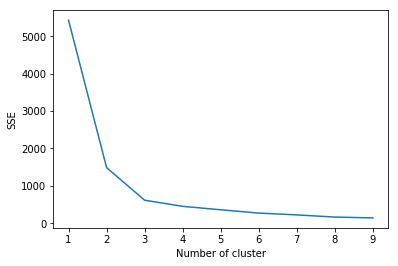

In [64]:
#Kmeans Clustering
#toronto_grouped_clustering_km = toronto_grouped.drop('Neighbourhood', 1)
toronto_grouped_clustering_km = toronto_super_total.drop('Neighbourhood', 1)
sse={}
for k in range(1,10):
    # run k-means clustering
    kmeans_loop = KMeans(init='k-means++',n_clusters=k, random_state=0,n_init=15).fit(toronto_grouped_clustering_km)
    sse[k]=kmeans_loop.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [65]:
#Cluster Neighborhoods
# set number of clusters
kclusters = 2

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [66]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
for i in range(0,len(unique)):
    print('Label: {}, Count: {}'.format(unique[i],counts[i]))

Label: 0, Count: 34
Label: 1, Count: 5


<H2> Base on above clustering, Agglomerative Clustering is suitable </h2>

In [67]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted_order.copy()
toronto_merged = df_toronto_borough.copy()
neighborhoods_venues_sorted_order.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Sushi Restaurant,Bookstore,Seafood Restaurant,Asian Restaurant,Breakfast Spot
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Seafood Restaurant,Beer Bar,Farmers Market,Gourmet Shop
2,"Brockton,Exhibition Place,Parkdale Village",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Gym,Pet Store,Performing Arts Venue,Nightclub,Japanese Restaurant,Italian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Park,Pizza Place,Recording Studio,Restaurant,Burrito Place,Brewery,Light Rail Station,Skate Park
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Coffee Shop,Airport,Airport Food Court,Airport Gate,Bar,Harbor / Marina


In [68]:
# add label to cluster dataframe
toronto_super_total_label = toronto_super_total.copy()
toronto_super_total_label.insert(0, 'Cluster Labels', agglom.labels_)

In [69]:
#toronto_super_total_label

In [70]:
# add clustering labels
#neighborhoods_venues_sorted = neighborhoods_venues_sorted_order
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', agglom.labels_)

#toronto_merged = df_toronto_borough

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_super_total_label.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Cluster Labels,Restaurant_yes,Bar_yes,Snack_yes
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,2,1,1,0
1,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188,0,16,4,5
2,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572,2,3,3,3
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923,0,13,7,4
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790,2,0,0,0


In [71]:
toronto_merged['Cluster Labels'].value_counts()

2    17
0    12
1    10
Name: Cluster Labels, dtype: int64

<H2> Results </h2>

<H3> Plot the map </H3>

In [138]:
# map
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(aggom_cluster)
ys = [i + x + (i*x)**2 for i in range(aggom_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<H2> Separate the cluster </H2>

In [80]:
# cluster 1
#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster_1=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, ]
toronto_cluster_1

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Cluster Labels,Restaurant_yes,Bar_yes,Snack_yes
1,M4K,East Toronto,"The Danforth West,Riverdale",M4K,43.679557,-79.352188,0,16,4,5
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923,0,13,7,4
7,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790,0,11,1,8
11,M4X,Downtown Toronto,"Cabbagetown,St. James Town",M4X,43.667967,-79.367675,0,13,6,5
13,M5A,Downtown Toronto,Harbourfront,M5A,43.654260,-79.360636,0,9,4,7
16,M5E,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306,0,13,7,5
19,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",M5J,43.640816,-79.381752,0,16,10,9
25,M5S,Downtown Toronto,"Harbord,University of Toronto",M5S,43.662696,-79.400049,0,14,6,3
32,M6J,West Toronto,"Little Portugal,Trinity",M6J,43.647927,-79.419750,0,15,14,5
34,M6P,West Toronto,"High Park,The Junction South",M6P,43.661608,-79.464763,0,10,3,2


In [85]:
# cluster 2
#toronto_cluster_2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster_2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, ]
toronto_cluster_2

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Cluster Labels,Restaurant_yes,Bar_yes,Snack_yes
12,M4Y,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160,1,28,12,8
14,M5B,Downtown Toronto,"Ryerson,Garden District",M5B,43.657162,-79.378937,1,24,6,7
15,M5C,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418,1,30,9,8
17,M5G,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383,1,22,7,9
18,M5H,Downtown Toronto,"Adelaide,King,Richmond",M5H,43.650571,-79.384568,1,29,8,10
20,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",M5K,43.647177,-79.381576,1,31,10,10
21,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",M5L,43.648198,-79.379817,1,33,10,7
26,M5T,Downtown Toronto,"Chinatown,Grange Park,Kensington Market",M5T,43.653206,-79.400049,1,25,12,14
28,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,M5W,43.646435,-79.374846,1,22,9,6
29,M5X,Downtown Toronto,"First Canadian Place,Underground city",M5X,43.648429,-79.382280,1,33,9,8


In [86]:
#cluster 3
#toronto_cluster_3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster_3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, ]
toronto_cluster_3

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude,Cluster Labels,Restaurant_yes,Bar_yes,Snack_yes
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,2,1,1,0
2,M4L,East Toronto,"The Beaches West,India Bazaar",M4L,43.668999,-79.315572,2,3,3,3
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790,2,0,0,0
5,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197,2,1,0,1
6,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678,2,6,1,1
8,M4T,Central Toronto,"Moore Park,Summerhill East",M4T,43.689574,-79.383160,2,0,0,0
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",M4V,43.686412,-79.400049,2,4,4,2
10,M4W,Downtown Toronto,Rosedale,M4W,43.679563,-79.377529,2,0,0,0
22,M5N,Central Toronto,Roselawn,M5N,43.711695,-79.416936,2,0,0,0
23,M5P,Central Toronto,"Forest Hill North,Forest Hill West",M5P,43.696948,-79.411307,2,1,0,0


<H3> Plot the graph for all cluster from neighbours</h3>

In [82]:
legend_list=[]
small_legend=[]
for index, rows in pd.DataFrame(toronto_merged['Cluster Labels'].value_counts().reset_index()).iterrows():
    legend_list.append('Cluster: {}, Neighbourhoods: {}'.format(rows[0],rows[1]))
    small_legend.append('Cluster: {}'.format(rows[0]))
    print(legend_list[index])

Cluster: 2, Neighbourhoods: 17
Cluster: 0, Neighbourhoods: 12
Cluster: 1, Neighbourhoods: 10


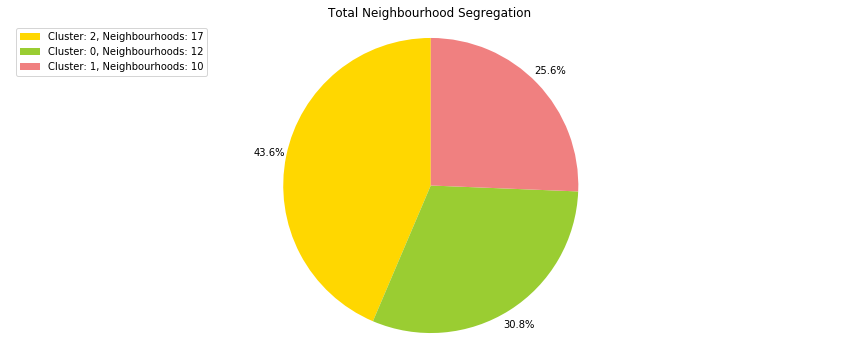

In [84]:
#legend_list=list(count.index)
colors_list = ['gold', 'yellowgreen', 'lightcoral']
toronto_merged['Cluster Labels'].value_counts().plot(kind='pie',
                                                          figsize=(15,6),
                                                          labels=None, 
                                                          autopct='%1.1f%%', 
                                                          startangle=90,
                                                          shadow=False,
                                                          colors=colors_list,
                                                          pctdistance=1.12,subplots=True)
                                                          

plt.title('Total Neighbourhood Segregation')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=legend_list,loc='upper left')

plt.show()

<h3> Base on above graph cluster 2 has more neighbours. </H3>
<H3> Cluster 0 - Moderate Restaurant and bar    Cluster 1 - Dense Restaurant and Bar     Cluster 2 - Low dense Restaurant and Bar  </h3>

<H1> Plot the bar chart for each area with number of restaurant, bars and breakfast or coffee point <h1>

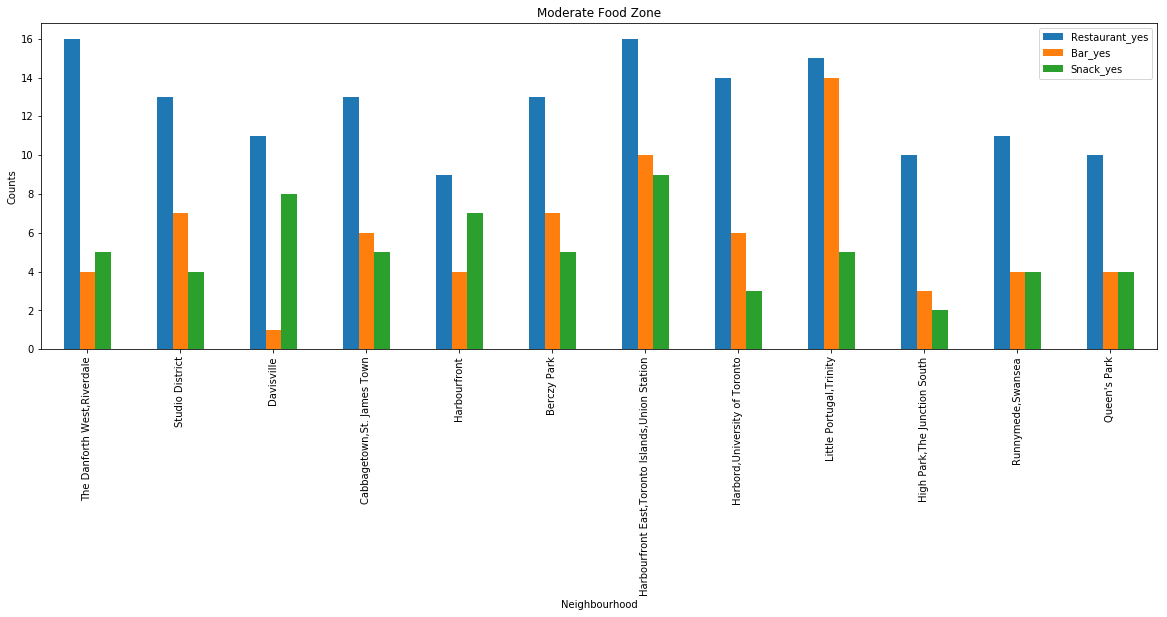

In [99]:
# plot for 1st cluster
toronto_cluster_1.plot(x="Neighbourhood", y=["Restaurant_yes", "Bar_yes", "Snack_yes"], kind="bar",figsize = (20,6)).set(xlabel='Neighbourhood', ylabel='Counts')
plt.title("Moderate Food Zone")
# Rotate x-labels
plt.show()

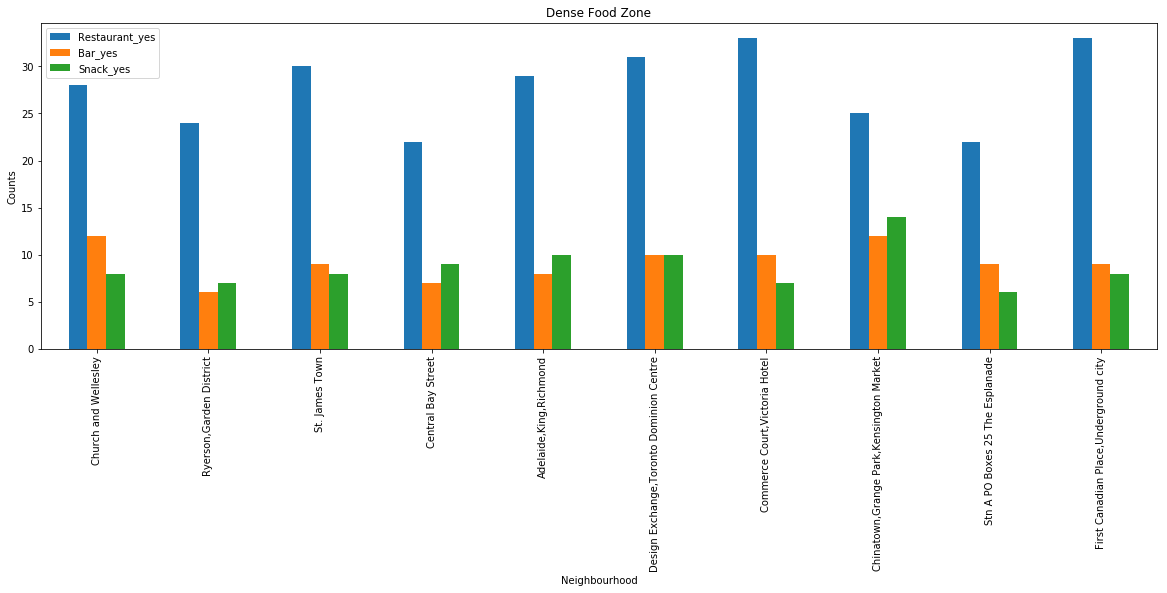

In [102]:
# plot for 2nd cluster
toronto_cluster_2.plot(x="Neighbourhood", y=["Restaurant_yes", "Bar_yes", "Snack_yes"], kind="bar",figsize = (20,6)).set(xlabel='Neighbourhood', ylabel='Counts')
plt.title("Dense Food Zone")
# Rotate x-labels
plt.show()

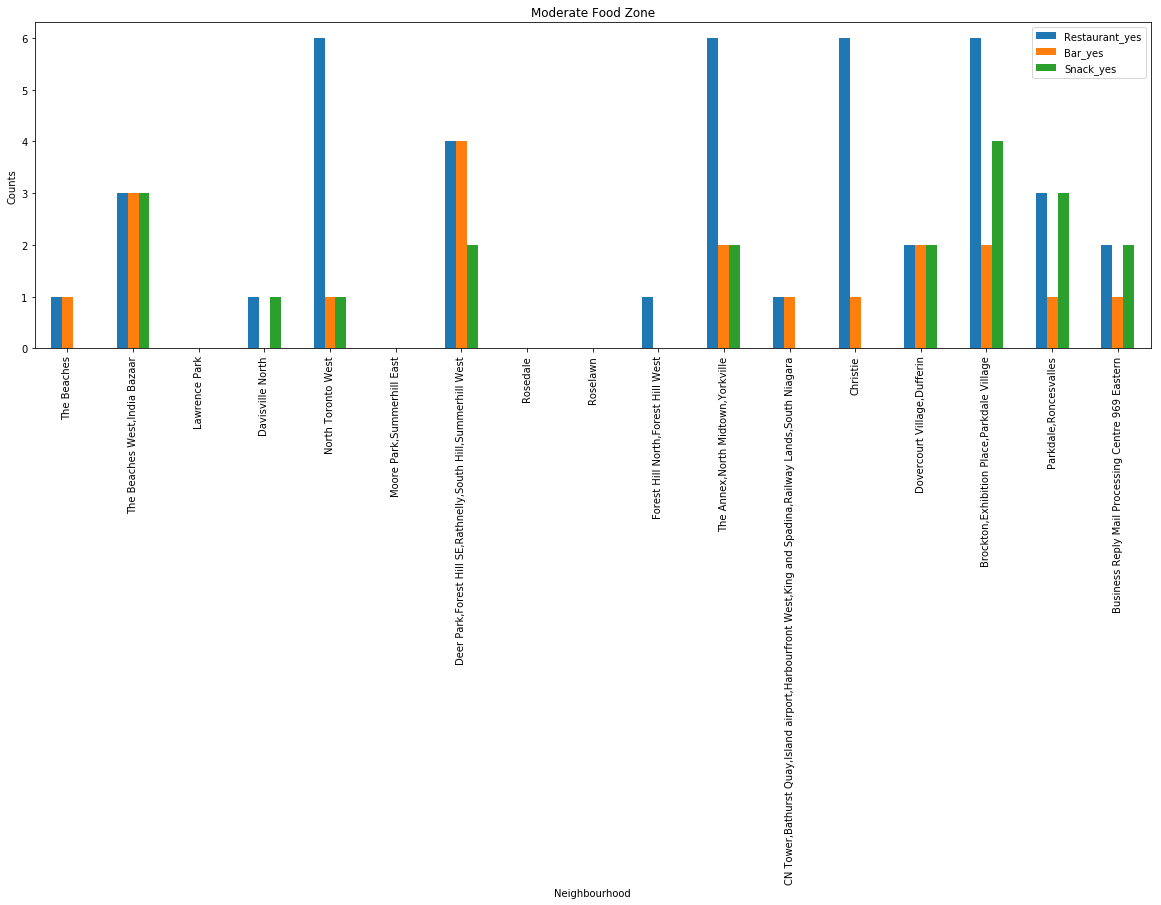

In [103]:
# plot for 3rd cluster
toronto_cluster_3.plot(x="Neighbourhood", y=["Restaurant_yes", "Bar_yes", "Snack_yes"], kind="bar",figsize = (20,6)).set(xlabel='Neighbourhood', ylabel='Counts')
plt.title("Moderate Food Zone")
# Rotate x-labels
plt.show()

<H1> Conclusion</H1> <p>
<H3> All neighbourhood belongs to cluster 1 is highly suitable for any restaurant and bar business. Food and party lover can also prefer this area to go due to lots of vareity. </H3>

In [114]:
toronto_onehot_copy = toronto_grouped.copy()
#toronto_onehot_copy = toronto_onehot_copy.drop(['Restaurant_yes','Bar_yes','Snack_yes'],axis=1)

In [125]:
# Merger each cluster with original dataset with list of resturant
cluster1_merge = toronto_cluster_1.join(toronto_onehot_copy.set_index('Neighbourhood'), on='Neighbourhood',how='left')
drop_col = ['Postcode', 'Borough', 'Postal Code', 'Latitude', \
       'Longitude', 'Cluster Labels', 'Restaurant_yes', 'Bar_yes',     \
       'Snack_yes']
cluster1_merge  = cluster1_merge.drop(drop_col,axis=1).set_index('Neighbourhood')
cluster1_merge = cluster1_merge[rest_list+snack_list+non_rest_list]
cluster1_merge.head()

,Café,Greek Restaurant,Restaurant,Italian Restaurant,Vietnamese Restaurant,Café,Japanese Restaurant,Mexican Restaurant,Thai Restaurant,Café,Restaurant,Italian Restaurant,Sushi Restaurant,Café,Sushi Restaurant,Food & Drink Shop,Japanese Restaurant,Asian Restaurant,Mexican Restaurant,Eastern European Restaurant,Diner,Health Food Store,Café,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Ethiopian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Restaurant,Japanese Restaurant,Chinese Restaurant,American Restaurant,Italian Restaurant,Seafood Restaurant,Ethiopian Restaurant,Café,Middle Eastern Restaurant,Diner,Seafood Restaurant,Airport Food Court,Vegetarian / Vegan Restaurant,Diner,Café,Middle Eastern Restaurant,Eastern European Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Seafood Restaurant,Mexican Restaurant,Fast Food Restaurant,Café,Eastern European Restaurant,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Portuguese Restaurant,Dumpling Restaurant,Italian Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Dumpling Restaurant,Ethiopian Restaurant,American Restaurant,Mexican Restaurant,Italian Restaurant,Diner,Chinese Restaurant,Comfort Food Restaurant,Italian Restaurant,Restaurant,Mediterranean Restaurant,Seafood Restaurant,American Restaurant,Cajun / Creole Restaurant,Café,Fast Food Restaurant,Doner Restaurant,Pizza Place,Bakery,Breakfast Spot,Breakfast Spot,Pizza Place,Bakery,Dessert Shop,Pizza Place,Burger Joint,Cheese Shop,Pizza Place,Bakery,Dessert Shop,Ice Cream Shop,Burger Joint,Bakery,Dessert Shop,Fried Chicken Joint,Pizza Place,Bakery,Burger Joint,Breakfast Spot,Fried Chicken Joint,Pizza Place,Burrito Place,Burrito Place,Pizza Place,Ice Cream Shop,Bakery,Breakfast Spot,Pizza Place,Dessert Shop,Donut Shop,Pizza Place,Breakfast Spot,Fried Chicken Joint,Donut Shop,Bakery,Pizza Place,Yoga Studio,Airport Service,Grocery Store,Park,Playground,Clothing Store,Health & Beauty Service,Trail,Auto Workshop,Airport Lounge,Gym,Hotel,Pharmacy,Jewelry Store,Park,Aquarium,Bus Line,Trail,Gift Shop,Playground,Pool,Clothing Store,Sandwich Place,Neighborhood,Park,Airport Terminal,Sandwich Place,Grocery Store,Trail,Swim School,Yoga Studio,Sporting Goods Shop,Movie Theater,Garden,Yoga Studio,Sculpture Garden,Park,Hotel,Sandwich Place,Light Rail Station,Farmers Market,Department Store,Pharmacy,Gym,Recording Studio,Gas Station,Department Store,Music Venue,Bookstore,Event Space,Men's Store,Dog Run,Sandwich Place,Hotel,Yoga Studio,Fish & Chips Shop,Furniture / Home Store,Pet Store,Airport,Pool,Theater,Scenic Lookout,Electronics Store,Yoga Studio,Bookstore,Performing Arts Venue,Gym,Electronics Store,Sporting Goods Shop,Park,IT Services,Cosmetics Shop,Hotel,BBQ Joint,Discount Store,Frozen Yogurt Shop,Airport Gate,Park,Candy Store,Cosmetics Shop,Supermarket,Hotel,Music Venue,Fish & Chips Shop,Farmers Market,Yoga Studio,History Museum,Distribution Center,Farmers Market,Light Rail Station,Sandwich Place,Baby Store,Hotel,Deli / Bodega,Indie Movie Theater,Clothing Store,Creperie,Flower Shop,Dog Run,Gourmet Shop,Skate Park,Harbor / Marina,Butcher,Department Store,Grocery Store,Electronics Store,Supermarket,Bookstore,College Auditorium,Theater,Sandwich Place,Movie Theater
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"The Danforth West,Riverdale",0.024390,0.219512,0.024390,0.073171,0.0,0.024390,0.000000,0.000000,0.000000,0.024390,0.024390,0.073171,0.000000,0.024390,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.024390,0.000000,0.024390,0.073171,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.024390,0.000000,0.000000,0.024390,0.073171,0.000000,0.0,0.024390,0.00000,0.024390,0.000000,0.0,0.0,0.024390,0.024390,0.00000,0.0,0.073171,0.024390,0.0,0.000000,0.000000,0.0,0.024390,0.0,0.000000,0.

In [126]:
#Lets get a word string for each neighbourhood cluster
word_list=[]
for k in cluster1_merge.index.values:
    word_string={}
    for value in cluster1_merge.columns[:-1]:
        word_string[''.join(value.split())]=cluster1_merge.loc[k,value]
    word_list.append(word_string)
len(word_list)

12

In [127]:
#Lets set the max words to 30, as we want to show the top 30 businesses
max_words1=10

In [136]:
#!conda install -c conda-forge wordcloud=1.2.1

In [135]:
#from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [130]:
wordcloud = WordCloud(background_color='white',max_words=max_words1,collocations=False,relative_scaling=0.5).generate_from_frequencies(word_list[0])
# display the cloud
fig = plt.figure(figsize=(20,6))
# fig.set_figwidth(14)
# fig.set_figheight(22)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: name 'WordCloud' is not defined